In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
path='/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r1i1p1/'
file='tas_Amon_CCSM4_rcp45_r1i1p1_200601-210012.nc'
print(path+file)

/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r1i1p1/tas_Amon_CCSM4_rcp45_r1i1p1_200601-210012.nc


In [3]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, time: 1140)
Coordinates:
  * time       (time) object 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                rcp45
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:                      Sl GHG Vl SS Ds SA BC MD OC Oz AA
    parent_experiment_id:         historical
    parent_experiment_rip:        r1i1p1
    branch_time:                  2005.0
    contact:                      cesm_data@ucar.edu
    references:                   Gent P. R., et.al. 2011: The Community Clim...
    initialization_method:        1
    physics_version:              1
    tracking_id:                  0bf35136-b266-44d2-9078-f3081b83b6ad
    acknowledgements:             The CESM project is supported by the Nation...
    cesm_casename:                b40.rcp4_5.1deg.001
    cesm_repotag:                 ccsm4_0_beta49
    cesm_compset:                 BRCP45CN
    resolution:                   f09_g16 (0.9x1.25_gx1v6)
    forcing_note:                 Additional information on the external forc...
    processed_by:                 strandwg on mirage0 at 20111021
    processing_code_information:  Last Changed Rev: 428 Last Changed Date: 20...
    product:                      output
    experiment:                   RCP4.5
    frequency:                    mon
    creation_date:                2011-10-21T21:56:22Z
    history:                      2011-10-21T21:56:22Z CMOR rewrote data to c...
    Conventions:                  CF-1.4
    project_id:                   CMIP5
    table_id:                     Table Amon (26 July 2011) 976b7fd1d9e1be31d...
    title:                        CCSM4 model output prepared for CMIP5 RCP4.5
    parent_experiment:            historical
    modeling_realm:               atmos
    realization:                  1
    cmor_version:                 2.7.1

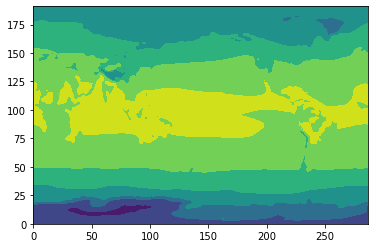

In [4]:
ds_mean=ds.mean(dim='time')
plt.contourf(ds_mean['tas'])

# Make figure larger
Also Add States

Text(0.5, 1.0, 'NCAR-CCSM4 RCP4.5 2100-2299')

/homes/kpegion/.conda/envs/clim680/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


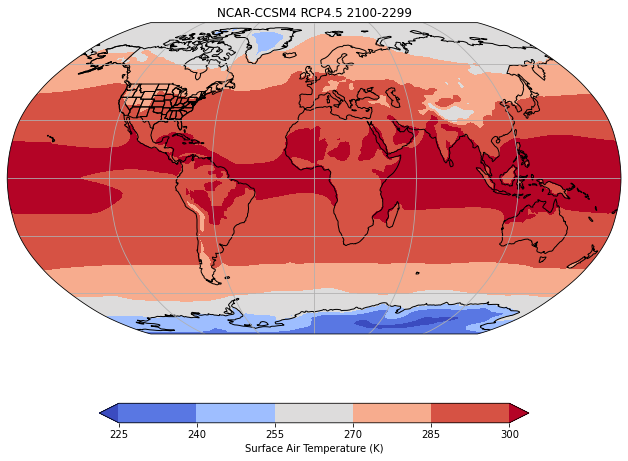

In [5]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point
data=ds_mean['tas']
data,lon=add_cyclic_point(data,coord=ds_mean['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ds_mean['lat'],
            data,
            transform=ccrs.PlateCarree(),
           cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add states
ax.add_feature(cfeature.STATES)

# Define the xticks for longtitude 
#ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
#lon_formatter=cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
#ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
#lat_formatter=cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Surface Air Temperature (K)')

# Add title
plt.title('NCAR-CCSM4 RCP4.5 2100-2299')